In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-real-data/Fake_Real_Data.csv


In [2]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from wordcloud import WordCloud

In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [4]:
df = pd.read_csv("/kaggle/input/fake-real-data/Fake_Real_Data.csv")
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [5]:
df.columns

Index(['Text', 'label'], dtype='object')

In [6]:
print(df["label"].value_counts())

label
Fake    5000
Real    4900
Name: count, dtype: int64


In [7]:
def preprocess(text):
    doc = nlp(text)
    tokens = [
        token.lemma_.lower()
        for token in doc
        if token.is_alpha and not token.is_stop
    ]
    return " ".join(tokens)

df["clean_text"] = df["Text"].fillna("").apply(preprocess)

df[["Text", "clean_text"]].head()

,Text,clean_text
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,trump surrogate brutally stabs pathetic video ...
1,U.S. conservative leader optimistic of common ...,conservative leader optimistic common ground h...
2,"Trump proposes U.S. tax overhaul, stirs concer...",trump propose tax overhaul stir concern defici...
3,Court Forces Ohio To Allow Millions Of Illega...,court forces ohio allow millions illegally pur...
4,Democrats say Trump agrees to work on immigrat...,democrats trump agree work immigration bill wa...


In [8]:
vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(df["clean_text"])
y = df["label"]

print("Feature matrix shape:", X.shape)

Feature matrix shape: (9900, 5000)


In [12]:
df["label"] = df["label"].map({"Fake": 0, "Real": 1})

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 7920
Testing samples: 1980


In [15]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score (weighted):", f1_score(y_test, y_pred, average="weighted"))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9924242424242424
F1-score (weighted): 0.9924236875892506

Classification Report:

              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99       973
        Real       0.99      1.00      0.99      1007

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



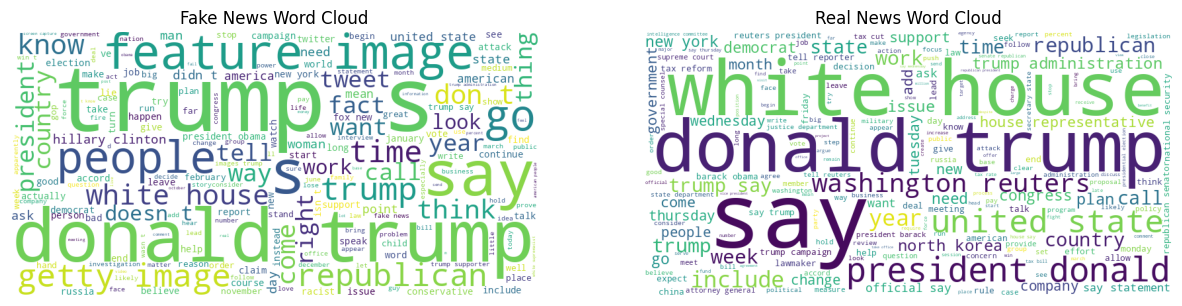

In [18]:
fake_text = " ".join(df[df["label"] == 0]["clean_text"])
real_text = " ".join(df[df["label"] == 1]["clean_text"])

fake_wc = WordCloud(width=800, height=400, background_color="white").generate(fake_text)
real_wc = WordCloud(width=800, height=400, background_color="white").generate(real_text)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.imshow(fake_wc)
plt.title("Fake News Word Cloud")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(real_wc)
plt.title("Real News Word Cloud")
plt.axis("off")

plt.show()

In [19]:
sample_text = df["Text"].iloc[0]

doc = nlp(sample_text)

for ent in doc.ents[:15]:
    print(ent.text, "->", ent.label_)

Republican -> NORP
Donald Trump -> PERSON
Fox News -> ORG
Newt Gingrich -> PERSON
Trump -> ORG
Trump -> ORG
Hillary Clinton -> PERSON
Trump -> ORG
Republicans -> NORP
House -> ORG
Paul Ryan -> PERSON
Trump -> PERSON
Gingrich -> PERSON
Fox News: Look -> ORG
first -> ORDINAL
